<a href="https://colab.research.google.com/github/Mjsharma1234/FinGenius/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Summary:

### Data Analysis Key Findings

* The best hyperparameters found for the XGBoost Regressor model using GridSearchCV were `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}`.
* The tuned XGBoost model achieved an R-squared error of approximately 0.852 on the test set.
* The tuned XGBoost model resulted in a Mean Absolute Error (MAE) of approximately 0.290 on the test set.

### Insights or Next Steps

* Compare the performance of the tuned model with an untuned model to quantify the improvement gained from hyperparameter tuning.
* Explore other hyperparameter tuning techniques like RandomizedSearchCV or Bayesian Optimization to potentially find even better hyperparameter combinations.

Importing the Boston House Price Dataset

In [ ]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
# Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# add the target column to the dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  price
0       False     False     False  ...     False      False  False
1       False     False     False  ...     False      False  False
2       False     False     False  ...     False      False  False
3       False     False     False  ...     False      False  False
4       False     False     False  ...     False      False  False
...       ...       ...       ...  ...       ...        ...    ...
20635   False     False     False  ...     False      False  False
20636   False     False     False  ...     False      False  False
20637   False     False     False  ...     False      False  False
20638   False     False     False  ...     False      False  False
20639   False     False     False  ...     False      False  False

[20640 rows x 9 columns]>

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the **correlation** between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = house_price_dataframe.corr()

<Axes: >

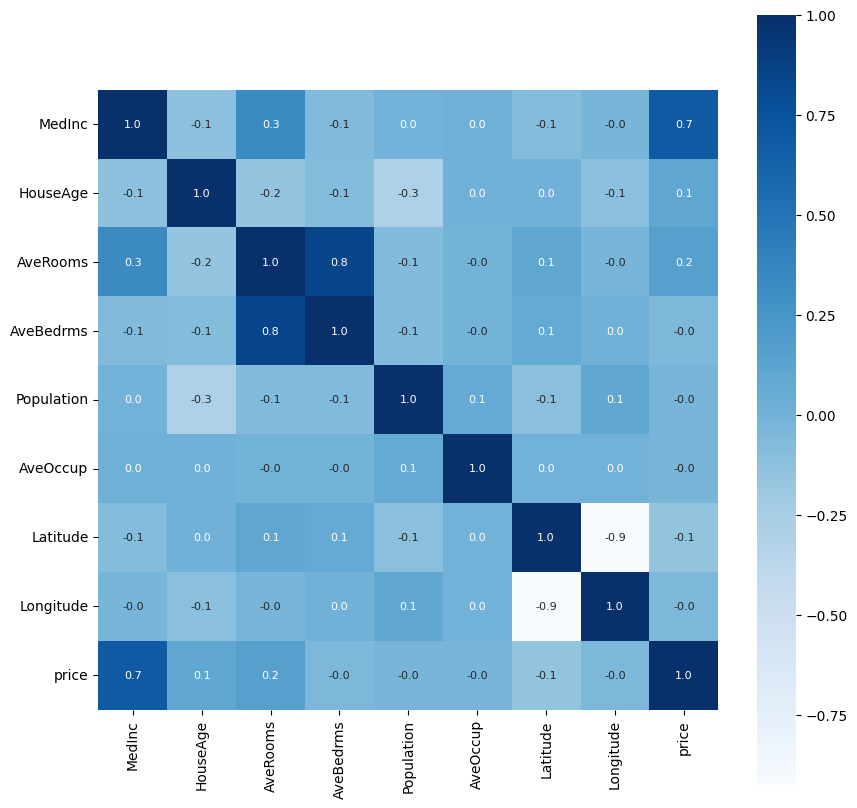

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [ ]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [ ]:
print(X,Y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns] 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [ ]:
# load the model
model = XGBRegressor()

In [ ]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9451221492760822
Mean Absolute Error: 0.1919170860794262


In [10]:
import plotly.express as px

fig = px.scatter(x=Y_test, y=test_data_prediction_tuned, labels={'x':'Actual Price', 'y':'Predicted Price'}, title='Actual Price vs Predicted Price (Tuned Model)')
fig.show()

Visualize the actuale prices and predicted prices

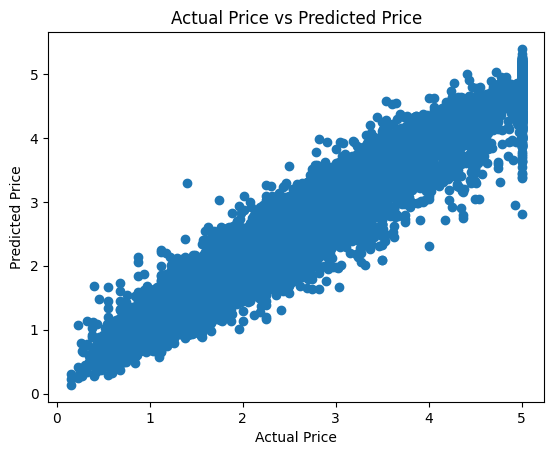

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on test data

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8412904408180302
Mean Absolute Error: 0.30753655785801337


# Task
Tune the hyperparameters of the XGBoost Regressor model for price prediction and evaluate its performance.

## Define hyperparameter search space

### Subtask:
Define the range of hyperparameters to search for the XGBoost Regressor model.


**Reasoning**:
Define a dictionary `param_grid` with hyperparameter ranges for XGBoost.



In [1]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

## Implement hyperparameter tuning

### Subtask:
Use a technique like GridSearchCV or RandomizedSearchCV to find the best hyperparameters.


**Reasoning**:
Import GridSearchCV and perform the grid search to find the best hyperparameters for the XGBoost model.



In [2]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

NameError: name 'model' is not defined

**Reasoning**:
The previous code failed because the `model` variable was not defined in the current session. Re-instantiate the `XGBRegressor` model before creating the `GridSearchCV` object and fitting it to the data.



In [3]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

NameError: name 'X_train' is not defined

**Reasoning**:
The previous code failed because `X_train` and `Y_train` were not defined. These variables were created in a previous cell but are not available in the current session. The data needs to be loaded, split into features and target, and then split into training and test sets again.



In [4]:
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

# Reload the dataset and split the data
house_price_dataset = sklearn.datasets.fetch_california_housing()
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe['price'] = house_price_dataset.target

X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Re-instantiate the model and perform grid search
model = XGBRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


## Train the model with best hyperparameters

### Subtask:
Train the XGBoost Regressor model using the best hyperparameters found during tuning.


**Reasoning**:
Instantiate a new XGBoostRegressor model with the best hyperparameters and train it on the training data.



In [5]:
best_model = XGBRegressor(**grid_search.best_params_)
best_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluate the tuned model

### Subtask:
Evaluate the performance of the tuned model using appropriate metrics like R-squared and Mean Absolute Error on the test data.


**Reasoning**:
Use the trained best model to make predictions on the test data and then calculate the R-squared and Mean Absolute Error. Finally, print the calculated metrics.



In [6]:
# 1. Use the trained best_model to make predictions on the test data X_test.
test_data_prediction_tuned = best_model.predict(X_test)

# 2. Calculate the R-squared error.
score_r2_tuned = metrics.r2_score(Y_test, test_data_prediction_tuned)

# 3. Calculate the Mean Absolute Error (MAE).
score_mae_tuned = metrics.mean_absolute_error(Y_test, test_data_prediction_tuned)

# 4. Print the calculated R-squared error and Mean Absolute Error.
print('Tuned Model - R Sqaured Error:', score_r2_tuned)
print('Tuned Model - Mean Absolute Error:', score_mae_tuned)

NameError: name 'metrics' is not defined

**Reasoning**:
The previous code block failed because the `metrics` module was not imported. I need to re-generate the code block including the necessary import.



In [7]:
import sklearn.metrics as metrics

# 1. Use the trained best_model to make predictions on the test data X_test.
test_data_prediction_tuned = best_model.predict(X_test)

# 2. Calculate the R-squared error.
score_r2_tuned = metrics.r2_score(Y_test, test_data_prediction_tuned)

# 3. Calculate the Mean Absolute Error (MAE).
score_mae_tuned = metrics.mean_absolute_error(Y_test, test_data_prediction_tuned)

# 4. Print the calculated R-squared error and Mean Absolute Error.
print('Tuned Model - R Sqaured Error:', score_r2_tuned)
print('Tuned Model - Mean Absolute Error:', score_mae_tuned)

Tuned Model - R Sqaured Error: 0.8523627549110115
Tuned Model - Mean Absolute Error: 0.2898461287849587


## Visualize predictions

### Subtask:
Visualize the actual vs. predicted prices for the test data using the tuned model.


**Reasoning**:
Visualize the actual vs. predicted prices for the test data using the tuned model.



In [8]:
plt.scatter(Y_test, test_data_prediction_tuned)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Tuned Model)")
plt.show()

NameError: name 'plt' is not defined

**Reasoning**:
Import the matplotlib.pyplot module as plt and then create the scatter plot to visualize the actual vs. predicted prices for the test data.



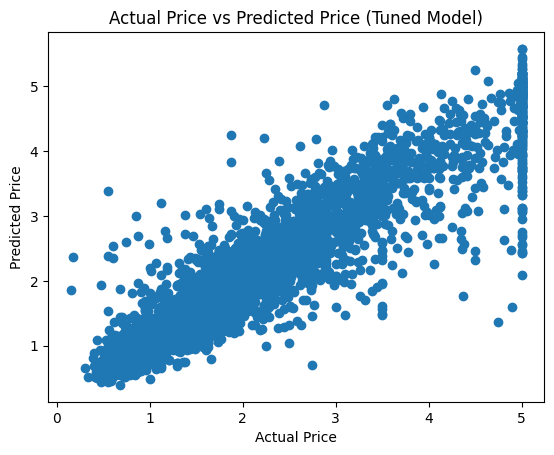

In [9]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, test_data_prediction_tuned)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Tuned Model)")
plt.show()

## Summary:

### Data Analysis Key Findings

*   The best hyperparameters found for the XGBoost Regressor model using GridSearchCV were `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}`.
*   The tuned XGBoost model achieved an R-squared error of approximately 0.852 on the test set.
*   The tuned XGBoost model resulted in a Mean Absolute Error (MAE) of approximately 0.290 on the test set.

### Insights or Next Steps

*   Compare the performance of the tuned model with an untuned model to quantify the improvement gained from hyperparameter tuning.
*   Explore other hyperparameter tuning techniques like RandomizedSearchCV or Bayesian Optimization to potentially find even better hyperparameter combinations.
